Shawn (HyungJoon) Yoon - I worked with Annie Jung

8hrs

Yes, I followed the honor code. 

In [1]:
from linearmodels import OLS
import pandas as pd
%matplotlib inline

### Auto Industry Analysis

In [2]:
df_auto = pd.read_csv('data/allcott_wozny/AllcottWoznyData.csv')
df_auto.head()

,Year,Month,PriceDifference,GasCostDifference
0,1999,1,4901.093,2188.148
1,1999,2,4921.221,2182.759
2,1999,3,4917.779,2260.314
3,1999,4,5017.132,2336.860
4,1999,5,5032.363,2396.757


In [3]:
# overall sample regression 

model = OLS.from_formula('PriceDifference ~ 1 + GasCostDifference', df_auto) # Complete details
res = model.fit()

print(res.summary)

                            OLS Estimation Summary                            
Dep. Variable:        PriceDifference   R-squared:                      0.8196
Estimator:                        OLS   Adj. R-squared:                 0.8181
No. Observations:                 120   F-statistic:                    718.31
Date:                Mon, Nov 18 2019   P-value (F-stat)                0.0000
Time:                        07:47:15   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                                 Parameter Estimates                                 
                   Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------
Intercept             7186.8     141.60     50.755     0.0000      6909.3      7464.4
GasCostDifference    -0.

A) Report your estimate of ψ from the full 1999-2008 sample.

ψ = 0.9415

In [4]:
# early sample regression 

df_auto_early = df_auto.loc[df_auto.Year <= 2003]

model = OLS.from_formula('PriceDifference ~ 1 + GasCostDifference', df_auto_early)
res = model.fit()

print(res.summary)

                            OLS Estimation Summary                            
Dep. Variable:        PriceDifference   R-squared:                      0.0657
Estimator:                        OLS   Adj. R-squared:                 0.0495
No. Observations:                  60   F-statistic:                    9.1298
Date:                Mon, Nov 18 2019   P-value (F-stat)                0.0025
Time:                        07:47:17   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                                 Parameter Estimates                                 
                   Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------
Intercept             5729.2     396.60     14.446     0.0000      4951.9      6506.6
GasCostDifference    -0.

B) Report your estimate of ψ if you limit the sample to 1999-2003.

ψ = 0.3941

C) Does this estimate provide support for the arguments made in the Regulatory
Impact Analyses?

The Regulatory Impact Analysis states that consumers might benefit from being forced to buy higher fuel economy vehicles than they would otherwise buy, because fuel costs are a non-salient "hidden fee" like bag fees or shipping and handling charge.

The psi values are less than 1 (0.9415, 0.3941), which in turn means that the regulation will be effective. Therefore, the consumers will benefit from being forced to buy higher fuel economy with a higher  𝑝1 , the non-hidden fee. For example, assuming that  𝜓  value is 0.5, and there is a car A with a gas fee of 50 dollars (high efficiency vehicle) and B with gas fee of 100 dollars (low efficiency vehicle). Then, the hidden fee would be 25 dollars and 50 dollars respectively, and it would be beneficial to purchase car A, the high efficiency vehicle. Therefore, as RIA argued consumers will benefit from being forced to buy higher fuel economy vehicles. Furthermore, the quantity demanded by the perceived price will be closer to the quantity demanded by the true price. In other words, there will be less efficiency loss, which once again provides support for RIA's arguments.

### AIRLINE ANALYSIS

In [5]:
df_airfare = pd.read_csv("data/agarwal_et_al/AirfareData.csv")
df_airfare.tail()

,t,year,quarter,YQ,ATPI,FuelPrice,FuelConsumption,Passengers,FuelCons_Pass,FuelCost_Pass,CPI
60,61,2010,1,20101,114.97,2.049667,16304,670370501,24.320879,49.849695,220.602
61,62,2010,2,20102,119.01,2.121333,16304,670370501,24.320879,51.592692,221.193
62,63,2010,3,20103,120.24,2.072000,16304,670370501,24.320879,50.392862,221.551
63,64,2010,4,20104,119.38,2.341333,16304,670370501,24.320879,56.943285,222.077
64,65,2011,1,20111,124.43,2.861000,16349,681353394,23.994890,68.649381,223.011


In [6]:
########## Prepare data
# Get price and marginal cost in 2011 dollars

df_airfare['price_2011'] = df_airfare.ATPI / df_airfare.CPI # Complete details
df_airfare['price_2011'] *= 296/df_airfare['price_2011'].iloc[0]
df_airfare.head()

,t,year,quarter,YQ,ATPI,FuelPrice,FuelConsumption,Passengers,FuelCons_Pass,FuelCost_Pass,CPI,price_2011
0,1,1995,1,19951,100.00,0.462667,17323,526055483,32.929987,15.235607,159.6,296.000000
1,2,1995,2,19952,101.87,0.496333,17323,526055483,32.929987,16.344250,160.8,299.284937
2,3,1995,3,19953,102.27,0.492000,17323,526055483,32.929987,16.201553,161.6,298.972675
3,4,1995,4,19954,98.60,0.526333,17323,526055483,32.929987,17.332150,163.0,285.768206
4,5,1996,1,19961,98.36,0.564333,17845,558183741,31.969760,18.041601,164.2,282.989268


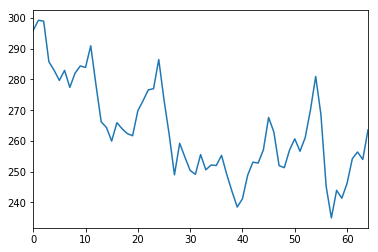

In [7]:
df_airfare.price_2011.plot()

In [9]:
df_airfare['mc_fuel'] = df_airfare.FuelCost_Pass * df_airfare.CPI.iloc[-1] / df_airfare.CPI# Complete details

In [10]:
dummies = pd.get_dummies(df_airfare.quarter) # Complete details
dummies.columns = ['Q{}'.format(quarter) for quarter in dummies.columns]
df_airfare = pd.concat((df_airfare, dummies), axis=1)
df_airfare.head()

,t,year,quarter,YQ,ATPI,FuelPrice,FuelConsumption,Passengers,FuelCons_Pass,FuelCost_Pass,CPI,price_2011,mc_fuel,Q1,Q2,Q3,Q4
0,1,1995,1,19951,100.00,0.462667,17323,526055483,32.929987,15.235607,159.6,296.000000,21.288897,1,0,0,0
1,2,1995,2,19952,101.87,0.496333,17323,526055483,32.929987,16.344250,160.8,299.284937,22.667584,0,1,0,0
2,3,1995,3,19953,102.27,0.492000,17323,526055483,32.929987,16.201553,161.6,298.972675,22.358444,0,0,1,0
3,4,1995,4,19954,98.60,0.526333,17323,526055483,32.929987,17.332150,163.0,285.768206,23.713252,0,0,0,1
4,5,1996,1,19961,98.36,0.564333,17845,558183741,31.969760,18.041601,164.2,282.989268,24.503505,1,0,0,0


In [11]:
# pass-through regression

model = OLS.from_formula('price_2011~1+mc_fuel+Q1+Q2+Q3+t', data=df_airfare)# Complete details 
res = model.fit()
print(res.summary)

                            OLS Estimation Summary                            
Dep. Variable:             price_2011   R-squared:                      0.7034
Estimator:                        OLS   Adj. R-squared:                 0.6783
No. Observations:                  65   F-statistic:                    150.36
Date:                Mon, Nov 18 2019   P-value (F-stat)                0.0000
Time:                        11:34:08   Distribution:                  chi2(5)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      272.75     3.0204     90.300     0.0000      266.83      278.67
mc_fuel        0.5927     0.0716     8.2797     0.00